# Instrucciones

- Some rows contain errors, clean these rows and include them in your analysis.
- Show modeling. 
- Test model’s error using a test set.

Find out ow much the diamonds are worth

Data:

|0|Carat|Cut|Color|Clarity|Depth|Table|x|y|z|coordinates|
|---|---|---|---|---|---|---|---|---|---|---|
|1|0.71|Good|I|VVS2|63.1|58|5.64|5.71|3.58|35.02636, -114.38351|
|2|0.83|Ideal|G|VS1|62.1|55|6.02|6.05|3.75|35.00350, -109.78961|
|3|0.5|Ideal|E|VS2|61.5|55|5.11|5.16|3.16|35.10544, -106.669673|
|4|0.39|Premium|J|VS1|61.6|59|4.67|4.71|2.89|34.94666, -104.64730|
|5|0.32|Premium|G|VS1|62.1|56|4.43|4.4|2.74|35.18864, -101.98602|
|6|0.9|Good|F|SI2|63.3|57|6.08|6.14|3.87|35.26611, -99.63874|
|7|0.51|Ideal|D|VS1|60.9|57|5.2|5.17|3.16|35.51572, -97.67080|
|8|1.12|Ideal|G|VVS2|62.1|54.8|6.64|6.66|4.13|36.163605, -95.75950|
|9|0.4|Ideal|G|VVS2|62.4|56|4.72|4.74|2.95|37.689186, -92.6473|
|10|0.36|Premium|I|VS2|62.7|59|4.54|4.58|2.86|38.66303, -90.21808|


# Codigo

In [79]:
import pandas as pd
import matplotlib.pyplot as plt


df = pd.read_excel(r'D:\alex_\Documents\Programacion\Data Analysis\06 - The La pidarist Problem\Data.xlsx')
df.head()

,0,Carat,Cut,Color,Clarity,Depth,Table,x,y,z,coordinates
0,1,0.71,Good,I,VVS2,63.1,58.0,5.64,5.71,3.58,"35.02636, -114.38351"
1,2,0.83,Ideal,G,VS1,62.1,55.0,6.02,6.05,3.75,"35.00350, -109.78961"
2,3,0.50,Ideal,E,VS2,61.5,55.0,5.11,5.16,3.16,"35.10544, -106.669673"
3,4,0.39,Premium,J,VS1,61.6,59.0,4.67,4.71,2.89,"34.94666, -104.64730"
4,5,0.32,Premium,G,VS1,62.1,56.0,4.43,4.40,2.74,"35.18864, -101.98602"


In [80]:
# Data conversion

# 1. Carat: Valor numerico.
# 2. Cut: Categorias: 'Good', 'Ideal', 'Premium'
print("Cut: ", df["Cut"].unique())
cut_cat = df['Cut'].astype('category')
cut_dict = dict(enumerate(cut_cat.cat.categories))
df['Cut'] = df['Cut'].astype('category').cat.codes

# 3. Color: Categorias: 'I', 'G', 'E', 'J', 'F', 'D'
print("Color: ", df["Color"].unique())
color_cat = df['Color'].astype('category')
color_dict = dict(enumerate(color_cat.cat.categories))
df['Color'] = df['Color'].astype('category').cat.codes

# 4. Clarity: Categorias: 'VVS2', 'VS1', 'VS2', 'SI2'
print("Clarity: ", df["Clarity"].unique())
clarity_cat = df['Clarity'].astype('category')
clarity_dict = dict(enumerate(clarity_cat.cat.categories))
df['Clarity'] = df['Clarity'].astype('category').cat.codes

# 5. Depth: Valor numerico.
# 6. Table: Valor numerico.
# 7. x: Valor numerico.
# 8. y: Valor numerico.
# 9. z: Valor numerico.
# 10. Coordinates: latitud & longitud.

coord_extra = df["coordinates"].str.split(",",expand=True)
coord_extra.columns = ['x_coord', 'y_coord']
df = pd.concat([df, coord_extra], axis=1)
df['x_coord'] = df['x_coord'].astype(float)
df['y_coord'] = df['y_coord'].astype(float)

print(df.dtypes)

Cut:  ['Good' 'Ideal' 'Premium']
Color:  ['I' 'G' 'E' 'J' 'F' 'D']
Clarity:  ['VVS2' 'VS1' 'VS2' 'SI2']
0                int64
Carat          float64
Cut               int8
Color             int8
Clarity           int8
Depth          float64
Table          float64
x              float64
y              float64
z              float64
coordinates     object
x_coord        float64
y_coord        float64
dtype: object


,0,Carat,Cut,Color,Clarity,Depth,Table,x,y,z,coordinates,x_coord,y_coord
0,1,0.71,0,4,3,63.1,58.0,5.64,5.71,3.58,"35.02636, -114.38351",35.026360,-114.383510
1,2,0.83,1,3,1,62.1,55.0,6.02,6.05,3.75,"35.00350, -109.78961",35.003500,-109.789610
2,3,0.50,1,1,2,61.5,55.0,5.11,5.16,3.16,"35.10544, -106.669673",35.105440,-106.669673
3,4,0.39,2,5,1,61.6,59.0,4.67,4.71,2.89,"34.94666, -104.64730",34.946660,-104.647300
4,5,0.32,2,3,1,62.1,56.0,4.43,4.40,2.74,"35.18864, -101.98602",35.188640,-101.986020
5,6,0.90,0,2,0,63.3,57.0,6.08,6.14,3.87,"35.26611, -99.63874",35.266110,-99.638740
6,7,0.51,1,0,1,60.9,57.0,5.20,5.17,3.16,"35.51572, -97.67080",35.515720,-97.670800
7,8,1.12,1,3,3,62.1,54.8,6.64,6.66,4.13,"36.163605, -95.75950",36.163605,-95.759500
8,9,0.40,1,3,3,62.4,56.0,4.72,4.74,2.95,"37.689186, -92.6473",37.689186,-92.647300
9,10,0.36,2,4,2,62.7,59.0,4.54,4.58,2.86,"38.66303, -90.21808",38.663030,-90.218080


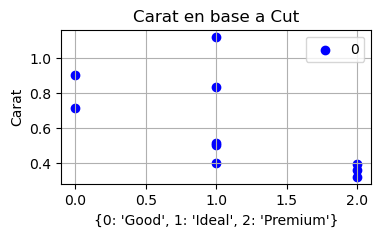

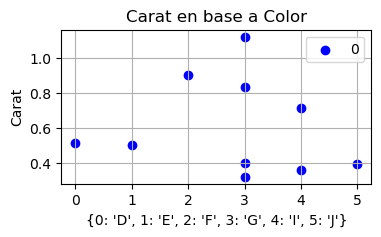

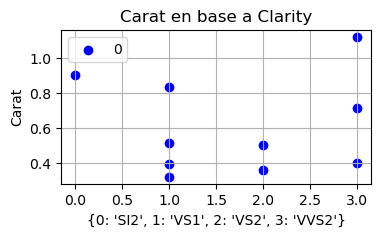

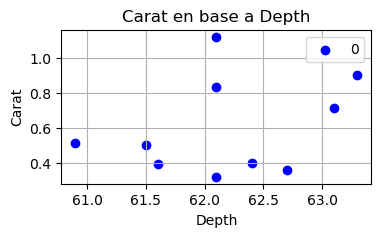

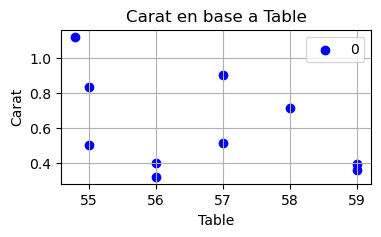

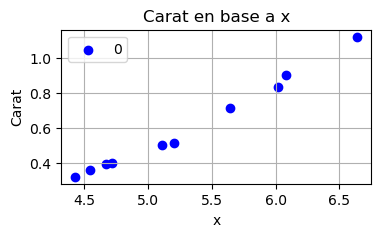

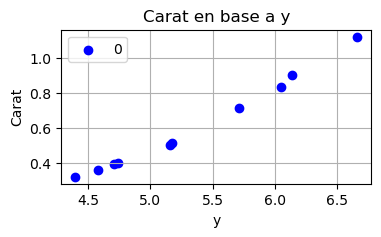

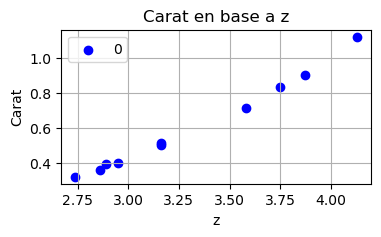

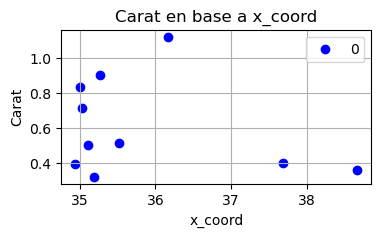

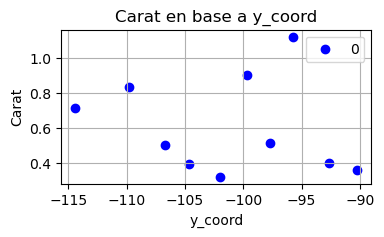

In [81]:
columnas = df.columns.drop([0, "Carat", "coordinates"])

for n in columnas:
    variable = df[n]


    plt.figure(figsize=(4, 2))
    plt.scatter(variable, df['Carat'], color='blue', label='Datos')
    plt.title(f'Carat en base a {variable.name}')

    try:
        plt.xlabel(eval((str(variable.name) + "_dict").lower()))
    except NameError:
        plt.xlabel(variable.name)

    plt.ylabel('Carat')
    plt.legend(cut_dict)
    plt.grid(True)
    plt.show()

# Analisis de Gráficas:

A primera vista se puede determinar que las variables con mayor correacion entre el carat o quilate (medida que sirve para cuantificar la masa y grado de pureza) son "x", "y" y "z".

Se realizaran dos modelos uno utilizando la totalidad de las variables y uno exclusivamnete con estas 3 ultimas variables.

Se escogio el modelo Random Forest por las siguientes razones:
- La cantidad pequeña de datos
- La no linealidad de los mismos. 
- El requisito de un minimo procesamiento de los datos, como el manejo de la normalizacion y colinealidad, que ante la poca cantidad de los mismos se vuelve redundante realizarla. 

Estas razones ponen al modelo por encima de otros, como la regresion lineal por la relacion lineal entre caracteristicas y la variable objeto; el modelo por regresion de vectores de soporte por requerir un alto ajuste de variables y regularizacion de las mismas; y redes neuronales que requieren una gran cantidad de datos. 

## Primer modelo: Todas las variables

In [87]:
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
from math import sqrt

# Dividir df entre training y test
X = df.drop(['Carat', 0,"coordinates"], axis=1)
print("X shape: ", X.shape)
y = df['Carat']
print("y shape: ", y.shape)

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20, random_state=10) 
print("X_train shape: ", X_train.shape)
print("X_test shape: ", X_test.shape)
print("y_train shape: ", y_train.shape)
print("y_test shape: ", y_test.shape)

# RandomForestRegressor
model = RandomForestRegressor(random_state=42)
model.fit(X_train, y_train)

# Predict on the test set
y_pred = model.predict(X_test)

# Evaluate the model
mae = mean_absolute_error(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)

print("MAE: ", mae)
print("MSE: ", mse)
print("RMSE: ", rmse)


X shape:  (10, 10)
y shape:  (10,)
X_train shape:  (8, 10)
X_test shape:  (2, 10)
y_train shape:  (8,)
y_test shape:  (2,)
MAE:  0.061849999999999766
MSE:  0.005067984999999966
RMSE:  0.07118978157010995


## SEgundo modelo: solo variables "x", "y", "z"

In [93]:

# Dividir df entre training y test
X2 = df[["x", "y", "z"]]
print("X shape: ", X2.shape)
y2 = df['Carat']
print("y shape: ", y2.shape)

X_train2, X_test2, y_train2, y_test2 = train_test_split(X2, y2, test_size=0.20, random_state=10) 
print("X_train shape: ", X_train2.shape)
print("X_test shape: ", X_test2.shape)
print("y_train shape: ", y_train2.shape)
print("y_test shape: ", y_test2.shape)

# RandomForestRegressor
model2 = RandomForestRegressor(random_state=42)
model2.fit(X_train2, y_train2)

# Predict on the test set
y_pred2 = model2.predict(X_test2)

# Evaluate the model
mae2 = mean_absolute_error(y_test2, y_pred2)
mse2 = mean_squared_error(y_test2, y_pred2)
rmse2 = np.sqrt(mse2)

print("MAE: ", mae2)
print("MSE: ", mse2)
print("RMSE: ", rmse2)


X shape:  (10, 3)
y shape:  (10,)
X_train shape:  (8, 3)
X_test shape:  (2, 3)
y_train shape:  (8,)
y_test shape:  (2,)
MAE:  0.013949999999999962
MSE:  0.00021440499999999854
RMSE:  0.014642574910171999



### Evaluacion del **modelo 1** por Random Forest:
1. Mean Absolute Error (MAE): 0.061
2. Mean Squared Error (MSE): 0.005
3. Root Mean Squared Error (RMSE): 0.071

### Interpretacion
1. MAE: en promedio, las predicciones del modelo tienen una desviacion de 0.061 quilates. 
2. MSE: El promedio del cuadrado de las diferencias entre los valores predichos y los reales es 0.005. 
3. RMSE: Tomando la raíz cuadrada de MSE, el error promedio es de aproximadamente 0.071 quilates. 


### Evaluacion del **modelo 2** por Random Forest:
1. Mean Absolute Error (MAE): 0.013
2. Mean Squared Error (MSE): 0.0002
3. Root Mean Squared Error (RMSE): 0.014

## Interpretacion
1. MAE: en promedio, las predicciones del modelo tienen una desviacion de 0.013 quilates. 
2. MSE: El promedio del cuadrado de las diferencias entre los valores predichos y los reales es 0.0002. 
3. RMSE: Tomando la raíz cuadrada de MSE, el error promedio es de aproximadamente 0.014 quilates. 

## Conclusion
Comparando el resultado de las metricas de error de ambos modelos, el segundo tiene un mejor ajuste a los datos y por consecuencia una mejor prediccion.
Al ser menor la MAE del segundo modelo, nos indica una desviación promedio menor, el menor MSE tambien sugiere que los errores al cuadrado son considerablemente menores, misma historica sucede con el RMSE.

Ambos modelos de Random Forest han sido entrenados y evaluados, mostrando un rendimiento razonablemente bueno para un modelo simple con un conjunto de datos pequeño. Las métricas de error del modelo podrían mejorarse si se tuviera mayor cantidad de datos.